<h3> Import Packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.utils import class_weight

<h3> Data Loading

In [2]:
# Read CSV files into pandas DataFrames
test = pd.read_csv("C:/Users/Kaavya/OneDrive - National University of Singapore/Y3S1/BT4012/Final Project/test.csv")
train = pd.read_csv("C:/Users/Kaavya/OneDrive - National University of Singapore/Y3S1/BT4012/Final Project/train.csv")
validate = pd.read_csv("C:/Users/Kaavya/OneDrive - National University of Singapore/Y3S1/BT4012/Final Project/validate.csv")

<h3> Feature Engineering

<h5> Total Number of Items Scanned

In [3]:
#Total Items
train['totalItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
test['totalItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
validate['totalItems'] = validate['scannedLineItemsPerSecond'] * validate['totalScanTimeInSeconds']

<h3>Feature Pre-processing

Neural Networks are sensitive to the scale of features. Hence, we use log scaling on features with exponential distribution and min-max scaler on features with normal distribution

<h5> Scaling

In [4]:
#Scaling
#Log scaler
train['valuePerSecond'] = np.log1p(train['valuePerSecond'] + 1e-10) 
test['valuePerSecond'] = np.log1p(test['valuePerSecond'] + 1e-10) 
validate['valuePerSecond'] = np.log1p(validate['valuePerSecond'] + 1e-10) 

train['scannedLineItemsPerSecond'] = np.log1p(train['scannedLineItemsPerSecond'] + 1e-10) 
test['scannedLineItemsPerSecond'] = np.log1p(test['scannedLineItemsPerSecond'] + 1e-10) 
validate['scannedLineItemsPerSecond'] = np.log1p(validate['scannedLineItemsPerSecond'] + 1e-10) 

train['lineItemVoidsPerPosition'] = np.log1p(train['lineItemVoidsPerPosition'] + 1e-10) 
test['lineItemVoidsPerPosition'] = np.log1p(test['lineItemVoidsPerPosition'] + 1e-10) 
validate['lineItemVoidsPerPosition'] = np.log1p(validate['lineItemVoidsPerPosition'] + 1e-10) 

In [5]:
#MinMax Scaler
min_max_scaler = MinMaxScaler()
train['trustLevel'] = min_max_scaler.fit_transform(train[['trustLevel']])
test['trustLevel'] = min_max_scaler.fit_transform(test[['trustLevel']])
validate['trustLevel'] = min_max_scaler.fit_transform(validate[['trustLevel']])

min_max_scaler = MinMaxScaler()
train['totalScanTimeInSeconds'] = min_max_scaler.fit_transform(train[['totalScanTimeInSeconds']])
test['totalScanTimeInSeconds'] = min_max_scaler.fit_transform(test[['totalScanTimeInSeconds']])
validate['totalScanTimeInSeconds'] = min_max_scaler.fit_transform(validate[['totalScanTimeInSeconds']])

min_max_scaler = MinMaxScaler()
train['grandTotal'] = min_max_scaler.fit_transform(train[['grandTotal']])
test['grandTotal'] = min_max_scaler.fit_transform(test[['grandTotal']])
validate['grandTotal'] = min_max_scaler.fit_transform(validate[['grandTotal']])

min_max_scaler = MinMaxScaler()
train['lineItemVoids'] = min_max_scaler.fit_transform(train[['lineItemVoids']])
test['lineItemVoids'] = min_max_scaler.fit_transform(test[['lineItemVoids']])
validate['lineItemVoids'] = min_max_scaler.fit_transform(validate[['lineItemVoids']])

min_max_scaler = MinMaxScaler()
train['scansWithoutRegistration'] = min_max_scaler.fit_transform(train[['scansWithoutRegistration']])
test['scansWithoutRegistration'] = min_max_scaler.fit_transform(test[['scansWithoutRegistration']])
validate['scansWithoutRegistration'] = min_max_scaler.fit_transform(validate[['scansWithoutRegistration']])

min_max_scaler = MinMaxScaler()
train['quantityModifications'] = min_max_scaler.fit_transform(train[['quantityModifications']])
test['quantityModifications'] = min_max_scaler.fit_transform(test[['quantityModifications']])
validate['quantityModifications'] = min_max_scaler.fit_transform(validate[['quantityModifications']])

min_max_scaler = MinMaxScaler()
train['totalItems'] = min_max_scaler.fit_transform(train[['totalItems']])
test['totalItems'] = min_max_scaler.fit_transform(test[['totalItems']])
validate['totalItems'] = min_max_scaler.fit_transform(validate[['totalItems']])

<h5> Correlation Heatmap for all Features after Scaling

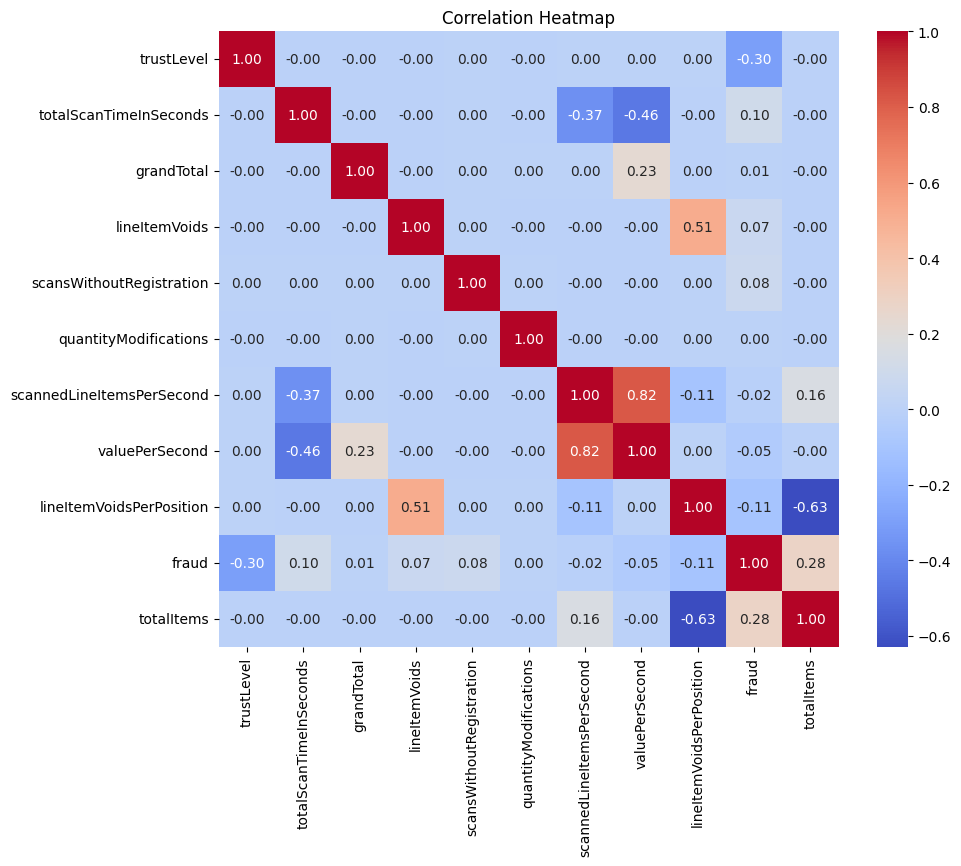

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h3> Neural Network on Base Model

In [7]:
feature_cols = [col for col in train.columns if (col != 'fraud')]
target_col = ['fraud']
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_validate = validate[feature_cols].copy()
y_validate = validate[target_col].copy()
X_test  = test[feature_cols].copy()
y_test  = test[target_col].copy()

In [8]:
# 1. Set seed for NumPy
np.random.seed(123)

# 2. Set seed for Python's built-in random module
random.seed(123)

# 3. Set seed for TensorFlow
tf.random.set_seed(123)

# Define the model
nn_1 = Sequential([
    Dense(100, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
nn_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_1.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
4922/4922 [==============================] - 7s 1ms/step - loss: 0.0315 - accuracy: 0.9882 - val_loss: 0.0274 - val_accuracy: 0.9876
Epoch 2/10
4922/4922 [==============================] - 6s 1ms/step - loss: 0.0194 - accuracy: 0.9915 - val_loss: 0.0174 - val_accuracy: 0.9924
Epoch 3/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0182 - accuracy: 0.9922 - val_loss: 0.0178 - val_accuracy: 0.9925
Epoch 4/10
4922/4922 [==============================] - 5s 988us/step - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0167 - val_accuracy: 0.9927
Epoch 5/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0170 - accuracy: 0.9924 - val_loss: 0.0191 - val_accuracy: 0.9918
Epoch 6/10
4922/4922 [==============================] - 6s 1ms/step - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0162 - val_accuracy: 0.9931
Epoch 7/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0139 - val_accurac

In [9]:
train_predict = nn_1.predict(X_train)
train_predictions_binary = (train_predict > 0.5).astype(int)
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, train_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, train_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, train_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, train_predictions_binary)))
print("_________________________________________________________")

validation_predict = nn_1.predict(X_validate)
validation_predictions_binary = (validation_predict > 0.5).astype(int)
print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, validation_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, validation_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, validation_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, validation_predictions_binary)))
print("_________________________________________________________")

10938/10938 [==============================] - 7s 633us/step
Train Data
Accuracy score: 0.9921
F1 score: 0.9129
Precision score: 0.9713
Recall score: 0.8611
_________________________________________________________
1563/1563 [==============================] - 1s 634us/step
Validate Data
Accuracy score: 0.9921
F1 score: 0.9137
Precision score: 0.9708
Recall score: 0.8629
_________________________________________________________


<h3> Neural Network on Selected Features

In [10]:
selected_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'totalItems']

feature_cols = [col for col in selected_features]
X_train_selected_features = train[feature_cols].copy()
X_validate_selected_features = validate[feature_cols].copy()
X_test_selected_features  = test[feature_cols].copy()

<h5> Correlation Heatmap for Selected Features

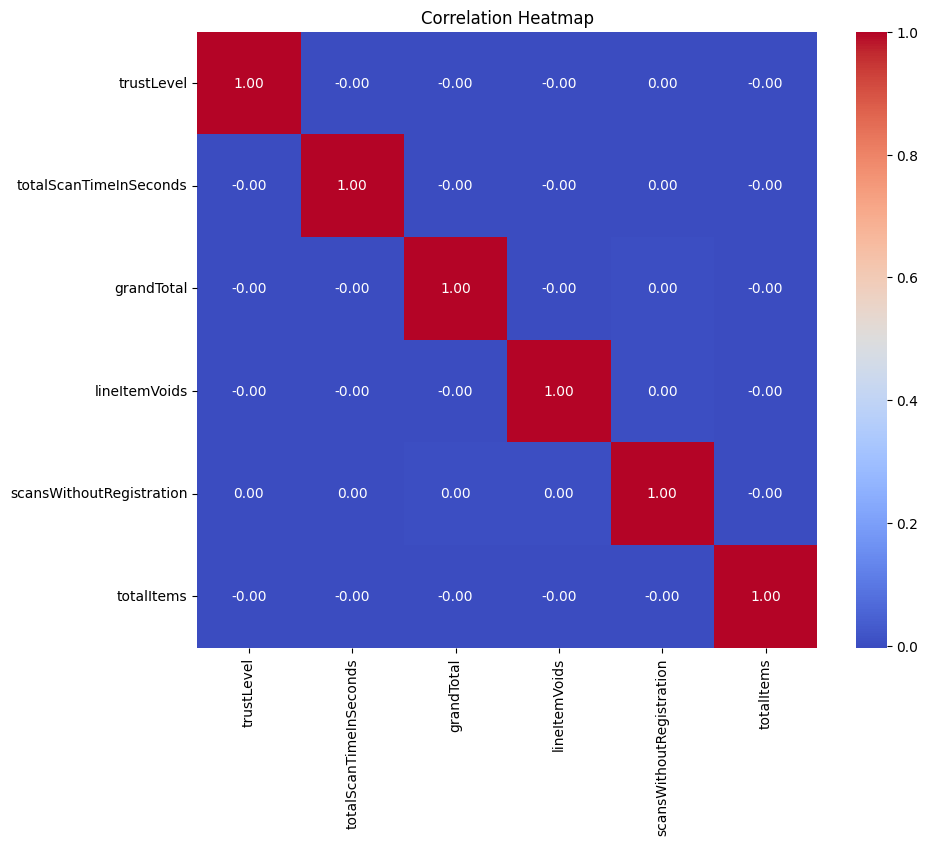

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_selected_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# 1. Set seed for NumPy
np.random.seed(0)

# 2. Set seed for Python's built-in random module
random.seed(0)

# 3. Set seed for TensorFlow
tf.random.set_seed(0)

# Define the model
nn_2 = Sequential([
    Dense(100, input_shape=(X_train_selected_features.shape[1],), activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
nn_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Train the model
nn_2.fit(X_train_selected_features, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
4922/4922 [==============================] - 6s 1ms/step - loss: 0.0319 - accuracy: 0.9877 - val_loss: 0.0262 - val_accuracy: 0.9877
Epoch 2/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0197 - accuracy: 0.9914 - val_loss: 0.0162 - val_accuracy: 0.9930
Epoch 3/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.0225 - val_accuracy: 0.9897
Epoch 4/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.0150 - val_accuracy: 0.9938
Epoch 5/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0173 - accuracy: 0.9923 - val_loss: 0.0147 - val_accuracy: 0.9943
Epoch 6/10
4922/4922 [==============================] - 5s 988us/step - loss: 0.0167 - accuracy: 0.9927 - val_loss: 0.0139 - val_accuracy: 0.9941
Epoch 7/10
4922/4922 [==============================] - 5s 997us/step - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0148 - val_accur

In [13]:
train_predict = nn_2.predict(X_train_selected_features)
train_predictions_binary = (train_predict > 0.5).astype(int)
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, train_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, train_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, train_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, train_predictions_binary)))
print("_________________________________________________________")

validation_predict = nn_2.predict(X_validate_selected_features)
validation_predictions_binary = (validation_predict > 0.5).astype(int)
print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, validation_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, validation_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, validation_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, validation_predictions_binary)))
print("_________________________________________________________")

10938/10938 [==============================] - 7s 613us/step
Train Data
Accuracy score: 0.9937
F1 score: 0.9339
Precision score: 0.9473
Recall score: 0.9208
_________________________________________________________
1563/1563 [==============================] - 2s 978us/step
Validate Data
Accuracy score: 0.9935
F1 score: 0.9319
Precision score: 0.9423
Recall score: 0.9217
_________________________________________________________


<h3>Hyperparameter Tuning

<h5> Randomized Search

In [14]:
# 1. Set seed for NumPy
np.random.seed(0)

# 2. Set seed for Python's built-in random module
random.seed(0)

# 3. Set seed for TensorFlow
tf.random.set_seed(0)

# Function to create a neural network model
def create_model(units_1, units_2, activation,  optimizer):
    model = Sequential([
        Dense(units_1, input_shape=(X_train_selected_features.shape[1],), activation=activation),
        Dense(units_2, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=1000, verbose=0)

# Define the parameter grid for grid search or random search
param_grid = {
    'units_1': list(range(50, 201, 20)),
    'units_2': list(range(10, 51, 10)),
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='f1', cv=10, n_iter=10, n_jobs=-1)
random_result = random_search.fit(X_train_selected_features, y_train)
print("Random Search - Best Hyperparameters:", random_result.best_params_)

C:\Users\kaavya\AppData\Local\Temp\ipykernel_33344\1974481436.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=1000, verbose=0)


Random Search - Best Hyperparameters: {'units_2': 30, 'units_1': 190, 'optimizer': 'adam', 'activation': 'relu'}


<h3> Neural Network using Best Hyperparameters

In [15]:
# 1. Set seed for NumPy
np.random.seed(0)

# 2. Set seed for Python's built-in random module
random.seed(0)

# 3. Set seed for TensorFlow
tf.random.set_seed(0)

# Define the model
nn_3 = Sequential([
        Dense(190, input_shape=(X_train_selected_features.shape[1],), activation='relu'),
        Dense(30, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


# Compile the model
nn_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_3.fit(X_train_selected_features, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
4922/4922 [==============================] - 5s 1000us/step - loss: 0.0324 - accuracy: 0.9875 - val_loss: 0.0242 - val_accuracy: 0.9889
Epoch 2/10
4922/4922 [==============================] - 5s 975us/step - loss: 0.0198 - accuracy: 0.9913 - val_loss: 0.0161 - val_accuracy: 0.9931
Epoch 3/10
4922/4922 [==============================] - 5s 975us/step - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.0250 - val_accuracy: 0.9890
Epoch 4/10
4922/4922 [==============================] - 5s 959us/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 5/10
4922/4922 [==============================] - 5s 973us/step - loss: 0.0173 - accuracy: 0.9924 - val_loss: 0.0150 - val_accuracy: 0.9937
Epoch 6/10
4922/4922 [==============================] - 5s 1ms/step - loss: 0.0167 - accuracy: 0.9926 - val_loss: 0.0138 - val_accuracy: 0.9940
Epoch 7/10
4922/4922 [==============================] - 5s 967us/step - loss: 0.0164 - accuracy: 0.9928 - val_loss: 0.0148 - 

In [16]:
train_predict = nn_3.predict(X_train_selected_features)
train_predictions_binary = (train_predict > 0.5).astype(int)
print("Train Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_train, train_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_train, train_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_train, train_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_train, train_predictions_binary)))
print("_________________________________________________________")

validation_predict = nn_3.predict(X_validate_selected_features)
validation_predictions_binary = (validation_predict > 0.5).astype(int)
print("Validate Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_validate, validation_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_validate, validation_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_validate, validation_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_validate, validation_predictions_binary)))
print("_________________________________________________________")

test_predict = nn_3.predict(X_test_selected_features)
test_predictions_binary = (test_predict > 0.5).astype(int)
print("Test Data")
print('Accuracy score: {:0.4f}'.format(accuracy_score(y_test, test_predictions_binary)))
print('F1 score: {:0.4f}'.format(f1_score(y_test, test_predictions_binary)))
print('Precision score: {:0.4f}'.format(precision_score(y_test, test_predictions_binary)))
print('Recall score: {:0.4f}'.format(recall_score(y_test, test_predictions_binary)))
print("_________________________________________________________")

10938/10938 [==============================] - 7s 674us/step
Train Data
Accuracy score: 0.9936
F1 score: 0.9323
Precision score: 0.9483
Recall score: 0.9168
_________________________________________________________
1563/1563 [==============================] - 1s 694us/step
Validate Data
Accuracy score: 0.9930
F1 score: 0.9268
Precision score: 0.9418
Recall score: 0.9123
_________________________________________________________
3125/3125 [==============================] - 2s 750us/step
Test Data
Accuracy score: 0.9936
F1 score: 0.9284
Precision score: 0.9465
Recall score: 0.9110
_________________________________________________________
